# NLP - Disaster Data

In [19]:
import pandas as pd

train_data = pd.read_csv("/home/jovyan/work/train.csv")
test_data = pd.read_csv("/home/jovyan/work/test.csv")

In [20]:
print("Training Data:")
print("Shape - {}".format(train_data.shape))
print("Columns - {}".format(train_data.columns))
print("Memory Usage - {:.2f} MB".format(train_data.memory_usage().sum() / 1024**2))

print("\nTesting Data:")
print("Shape - {}".format(test_data.shape))
print("Columns - {}".format(test_data.columns))
print("Memory Usage - {:.2f} MB".format(test_data.memory_usage().sum() / 1024**2))


Training Data:
Shape - (7613, 5)
Columns - Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
Memory Usage - 0.29 MB

Testing Data:
Shape - (3263, 4)
Columns - Index(['id', 'keyword', 'location', 'text'], dtype='object')
Memory Usage - 0.10 MB


In [21]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [22]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [23]:
print("Distinct keywords for test data: {}".format(test_data.keyword.drop_duplicates().count()))
print("Distinct keywords for test data: {}".format(train_data.keyword.drop_duplicates().count()))

Distinct keywords for test data: 221
Distinct keywords for test data: 221


In [24]:
# Find count of words that are in both 
keywords = []
for word in test_data.keyword.drop_duplicates():
    keywords.append(word)
for word in train_data.keyword.drop_duplicates():
    if word not in keywords:
        keywords.append(word)

print("Count of words in training data that aren't in test data: {}".format(len(keywords) - test_data.keyword.drop_duplicates().count()))

Count of words in training data that aren't in test data: 1


Both datasets have the same number of keywords. There is one keyword in training dataset that isn't in testing dataset. 

In [25]:
train_data.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

<AxesSubplot:title={'center':'Train Data: target'}, ylabel='target'>

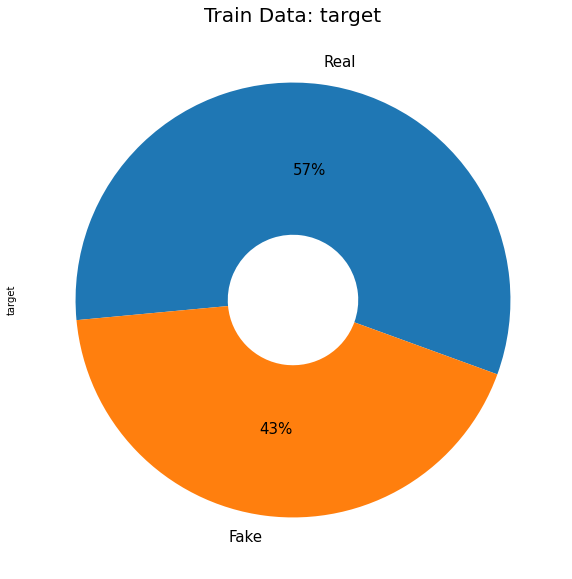

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
plt.title("Train Data: target", fontsize=20)
train_data.target.value_counts().plot(kind="pie",
                                    labels=["Real", "Fake"],
                                    wedgeprops=dict(width=.7),
                                    autopct="%1.0f%%",
                                    startangle=-20,
                                    textprops={"fontsize": 15})

There are a few more real examples than there are fake ones, it's good that it's a faily even split, it will be good to have plenty of both instances to work with.

Now we preprocess the data.

In [27]:
train_data.text.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [28]:
!pip install nltk==3.5
import nltk; nltk.download("stopwords")
!pip install textblob==0.15.3
!python -m textblob.download_corpora

def preprocessing_data(data):
    # Change all text to lowercase
    data.text = data.text.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    # Remove punctuation 
    data.text = data.text.str.replace("[^\w\s]","")

    # Remove stopwords
    from nltk.corpus import stopwords
    stop = stopwords.words("english")
    data.text = data.text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

    # Lemmatize words
    from textblob import Word
    data.text = data.text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

    # Remove words with length below 3
    data.text = data.text.apply(lambda x: " ".join(x for x in x.split() if len(x) > 2))

    # Remove rare words
    freq = pd.Series(" ".join(data).split()).value_counts()[-10:]
    freq = list(freq.index)
    data.text = data.text.apply(lambda x: " ".join(x for x in x.split() if x not in freq))

    # Remove common words
    freq = pd.Series(" ".join(data).split()).value_counts()[:10]
    freq = list(freq.index) 
    data.text = data.text.apply(lambda x: " ".join(x for x in x.split() if x not in freq))

    return data

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie

In [29]:
train_data = preprocessing_data(train_data)
test_data = preprocessing_data(test_data)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [30]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquake may allah forgive,1
1,4,NaN,NaN,forest fire near ronge sask canada,1
2,5,NaN,NaN,resident asked shelter place notified officer ...,1
3,6,NaN,NaN,13000 people receive wildfire evacuation order...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfire pour...,1


In [31]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,happened terrible car crash
1,2,NaN,NaN,heard earthquake different city stay safe ever...
2,3,NaN,NaN,forest fire spot pond goose fleeing across str...
3,9,NaN,NaN,apocalypse lighting spokane wildfire
4,11,NaN,NaN,typhoon soudelor kill china taiwan


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train = train_data["text"]
y_train = train_data["target"]
X_test = test_data["text"]

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [33]:
from sklearn import svm

svm = svm.SVC(C=100)

svm.fit(X_train, y_train)

SVC(C=100)

In [34]:
from sklearn.metrics import accuracy_score

X_test = vectorizer.transform(X_test)
test_preds = svm.predict(X_test)

df = pd.DataFrame()
df["id"] = test_data["id"]
df["target"] = test_preds 
df.to_csv("svm.csv", index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c78c5abb-b247-4c0f-b58d-e41858636e8c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>